<a href="https://colab.research.google.com/github/mattderri/LabII/blob/main/SmartAbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
from scipy.optimize import curve_fit as fit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def leggi_file(file_in):
  file_out=open('Output.dat','w')
  file_in=open(file_in)

  lines=[]
  for line in file_in:
    lines.append(line)
  for i in range(len(lines)):
    if (lines[i].startswith('==')==False):
      file_out.write("%s\n" %lines[i])

  file_out.close()

  data=pd.read_csv(file_out.name,delim_whitespace=True,header=None)

  return(data)

#Dark Counts


## Dark counts scheda sinistra (presa dati del 21/03)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/Dark_counts_scheda_sinistra.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#I canali 0,1,2,4,5 hanno conteggi totalmente sballati e li ho esclusi dal plot

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

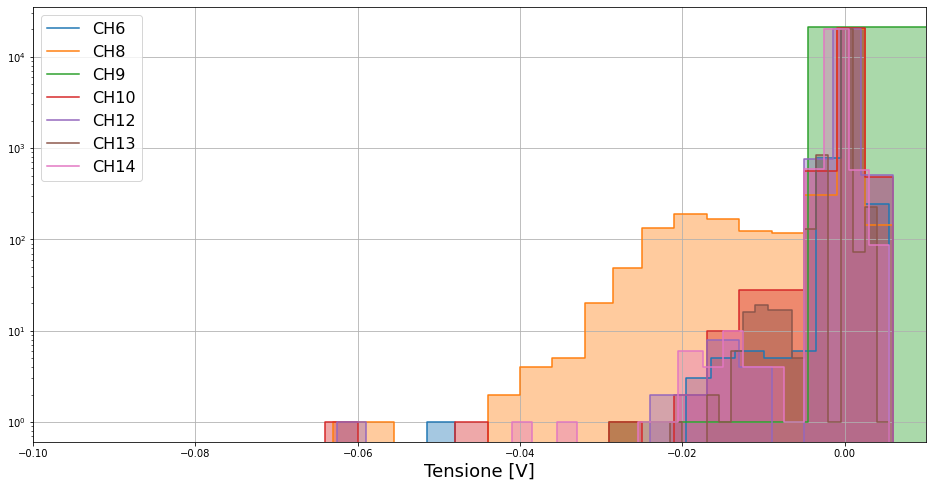

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.100,+0.010)

for i in range(5,12):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.xlabel('Tensione [V]',fontsize=18)
  plt.legend(loc=2, prop={'size': 16})

plt.show()

#plt.savefig('Scheda_sinistra.pdf')

## Dark counts $V_{th}=3\,mV$ (scheda destra)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/dark_counts_Vth3mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#Ci sono solo i canali 0,1,2,4,5,6,8,9,10==>scheda destra

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

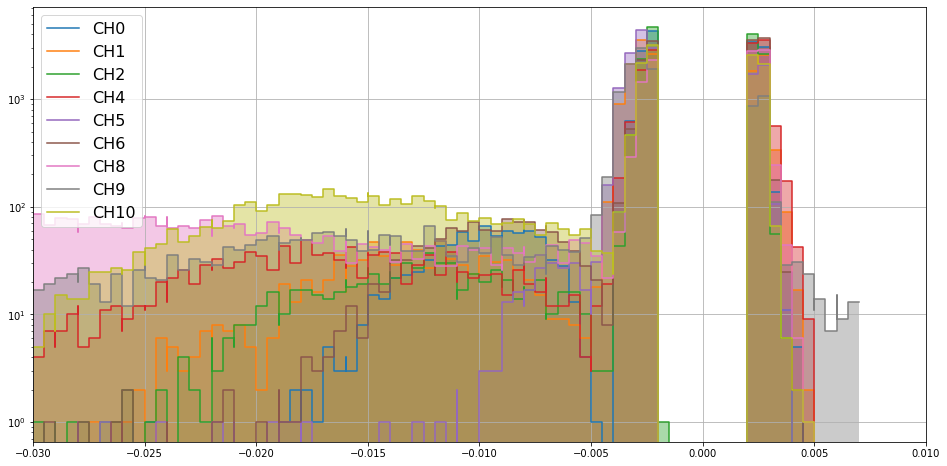

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

#plt.savefig('Vth3mv.pdf')

## Dark counts $V_{th}=4\,mV$ (scheda destra)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/dark_counts_brutti_Vth4mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#Ci sono solo i canali 0,1,2,4,5,6,8,9,10==>scheda destra

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

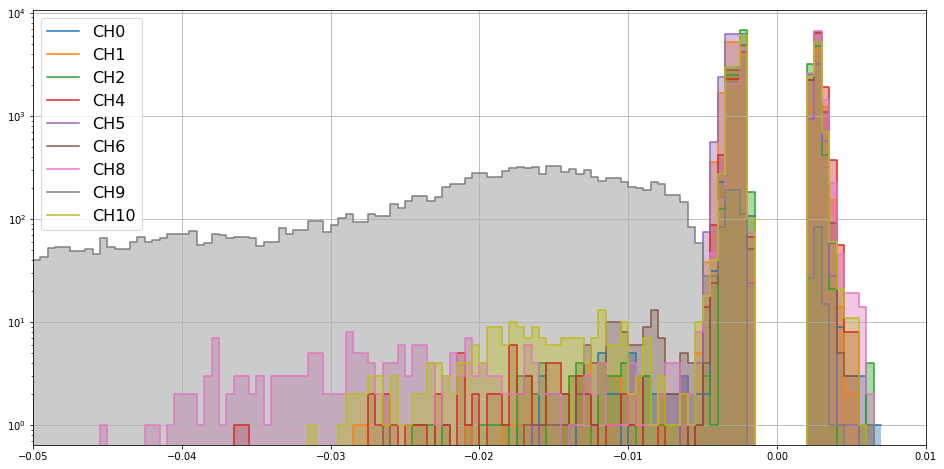

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.050,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

#plt.savefig('Vth4mv.pdf')

## Dark counts scheda sinistra (presa dati del 24/03)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/Histo_all_sx.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

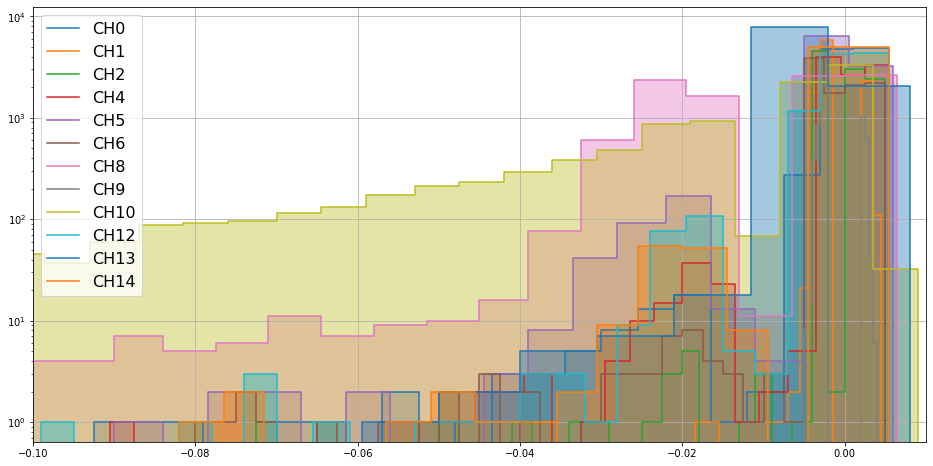

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.100,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

# Coincidenze (quasi sicuramente da scartare)

Inizio presa dati: 17h.33m.26s.532ms

Fine presa dati: 17h.34m.7s.224ms

$\Delta t=$ 40s.692ms

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/coincidenze_offline.dat")
labels=['CH0','CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8','CH9','CH10','CH11','CH12','CH13','CH14','CH15']
data=data.transpose()
data.columns=[labels[i%16] for i in range(0,16000)]

In [ ]:
canali={key:[] for key in labels}

for i in labels:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

In [ ]:
th=-0.005 #threshold impostata per la presa dati
t=40.692 #finestra temporale di presa dati

for j in range(0,len(labels),4):
  h=0
  k=0
  for i in range(len(canali['CH0'])):

    if(canali[labels[j]][i]<th and canali[labels[j+1]][i]<th):
      h=h+1
    if(canali[labels[j]][i]<th and canali[labels[j+1]][i]<th and canali[labels[j+2]][i]<th):
      k=k+1
  eff = k/h
  err = eff*m.sqrt(eff*(1-eff)/h)
  print('Rate di coincidenze tra',labels[j],'e',labels[j+1],':\t\t%.3f'%(h/t),'Hz [',h,'eventi]')
  print('Rate di coincidenze tra',labels[j],',',labels[j+1],'e',labels[j+2],':\t%.3f'%(k/t),'Hz [',k,'eventi]')
  print('Efficienza canale', labels[j+2],':\t%.3f'%(eff), ' +/- %.3f'%(err))
  print('')

Rate di coincidenze tra CH0 e CH1 :		5.284 Hz [ 215 eventi]
Rate di coincidenze tra CH0 , CH1 e CH2 :	2.310 Hz [ 94 eventi]
Efficienza canale CH2 :	0.437  +/- 0.015

Rate di coincidenze tra CH4 e CH5 :		2.531 Hz [ 103 eventi]
Rate di coincidenze tra CH4 , CH5 e CH6 :	0.123 Hz [ 5 eventi]
Efficienza canale CH6 :	0.049  +/- 0.001

Rate di coincidenze tra CH8 e CH9 :		12.681 Hz [ 516 eventi]
Rate di coincidenze tra CH8 , CH9 e CH10 :	4.694 Hz [ 191 eventi]
Efficienza canale CH10 :	0.370  +/- 0.008

Rate di coincidenze tra CH12 e CH13 :		7.962 Hz [ 324 eventi]
Rate di coincidenze tra CH12 , CH13 e CH14 :	5.726 Hz [ 233 eventi]
Efficienza canale CH14 :	0.719  +/- 0.018



# Rate


## Analisi della prima presa dati "Rates.dat" - 101 punti

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/Rates.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

In [ ]:
mean_rates = np.mean(data[labels])
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = np.sqrt(mean_rates)
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t\t{:.3f} +/- {:.3f} Hz".format(labels[i], mean_rates[labels[i]], err_rates[labels[i]]))

In [ ]:
triplet_counter = 1
PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
PMT_label = ['low', 'high', 'middle']
print("----------------------------------SCHEDA SINISTRA------------------------------------")
for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[4*i]*err_rates[4*i+j]/mean_rates[4*i+j]**2)**2 + (err_rates[4*i]**2/mean_rates[4*i+j])**2)
        print("\teff. detector {} ({})= {:.3f} +/- {:.3f}".format(PMT_number[3*i+j-1], PMT_label[j-1], eff, err))
    triplet_counter = triplet_counter + 1
    print("\n")

Presa dati con tripletta 8-9-10 non funzionante!!!!

## Analisi seconda presa dati completa "Rates_4.dat" - 600 punti, intervallo 1s, PMTs su scheda sinistra

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/rates_4.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

Valutazione delle medie aritmetiche da campione di rate

In [ ]:
from scipy.stats import describe
rate_stats=[describe(data[labels[i]]) for i in range(len(labels))]
rate_mean = [(rate_stats[i][2]/np.sqrt(rate_stats[i][3]))**2 for i in range(len(labels))]
rate_std = [np.sqrt(rate_stats[i][3]/data[labels[i]].size) for i in range(len(labels))]
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t{:.3f} +/- {:.3f} Hz".format(labels[i], rate_mean[i], rate_std[i]))


Rate di coincidenze canali 0-1-2 :	0.896 +/- 0.040 Hz
Rate di coincidenze canali 0-1 :	1.339 +/- 0.054 Hz
Rate di coincidenze canali 1-2 :	1.175 +/- 0.046 Hz
Rate di coincidenze canali 0-2 :	1.025 +/- 0.049 Hz
Rate di coincidenze canali 4-5-6 :	0.985 +/- 0.043 Hz
Rate di coincidenze canali 4-5 :	3.087 +/- 0.082 Hz
Rate di coincidenze canali 5-6 :	1.896 +/- 0.062 Hz
Rate di coincidenze canali 4-6 :	1.200 +/- 0.056 Hz
Rate di coincidenze canali 8-9-10 :	1.101 +/- 0.048 Hz
Rate di coincidenze canali 8-9 :	4.822 +/- 0.109 Hz
Rate di coincidenze canali 9-10 :	2.896 +/- 0.079 Hz
Rate di coincidenze canali 8-10 :	1.190 +/- 0.058 Hz
Rate di coincidenze canali 12-13-14 :	0.934 +/- 0.040 Hz
Rate di coincidenze canali 12-13 :	1.436 +/- 0.052 Hz
Rate di coincidenze canali 13-14 :	1.623 +/- 0.054 Hz
Rate di coincidenze canali 12-14 :	1.061 +/- 0.057 Hz


Valutazione delle medie tramite fit con scipy sulla distribuzione dei rate

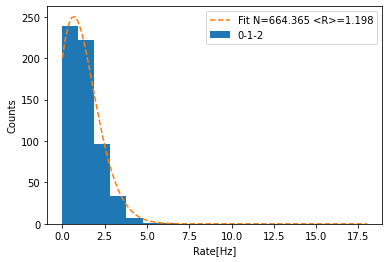

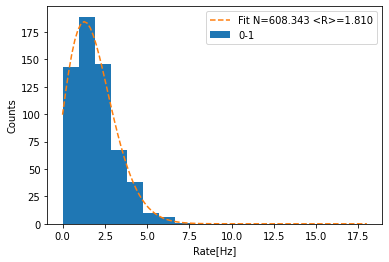

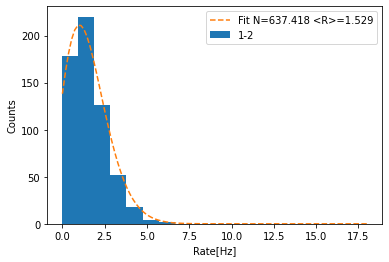

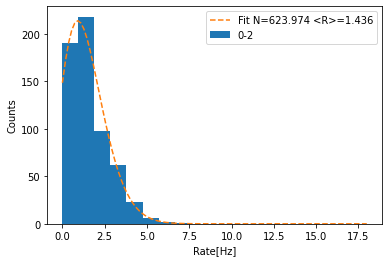

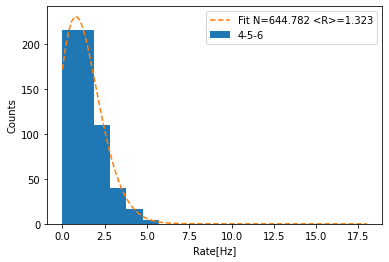

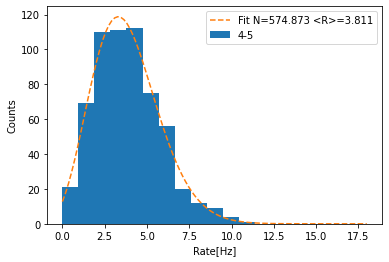

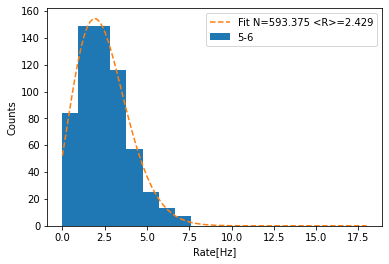

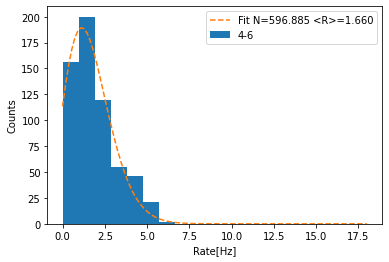

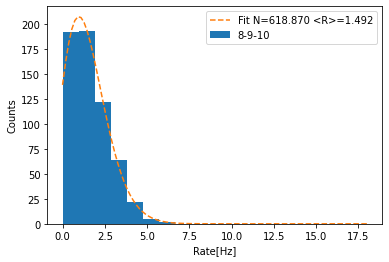

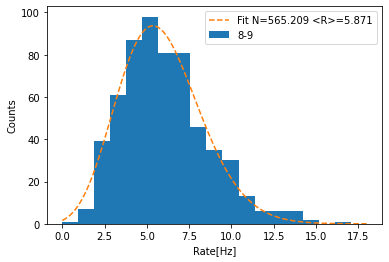

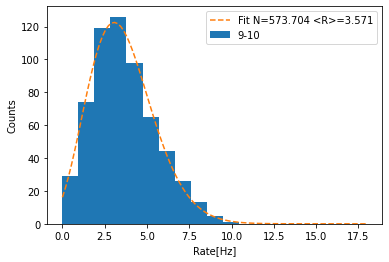

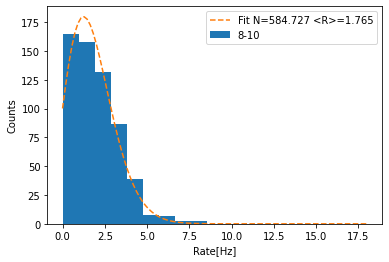

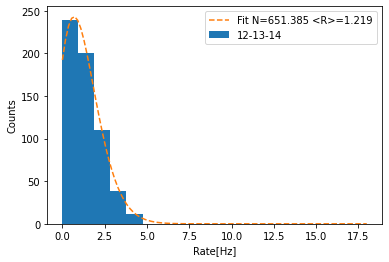

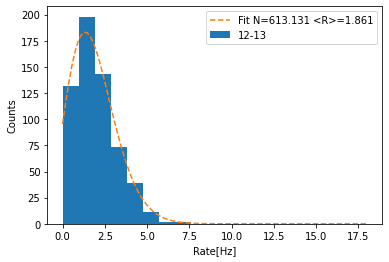

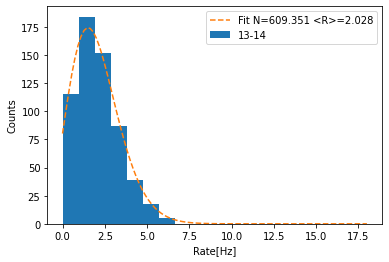

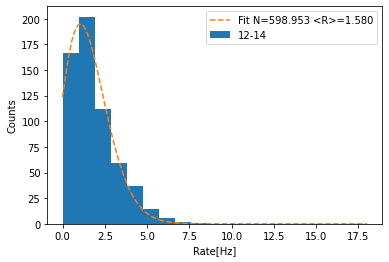

In [ ]:
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

mean_rates = np.mean(data[labels])
x = np.linspace(0,18, 100)
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = []
new_mean_rates = []
for i in range(0,len(labels)):
  binned_rates, bins, _ = plt.hist(data[labels[i]], bins=19, range=(0, 18), label=labels[i])
  centered_bins = np.array([ (bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
  plt.xlabel('Rate[Hz]')
  plt.ylabel('Counts')
  fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[i]].size, mean_rates[labels[i]]])
  plt.plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
  plt.legend()
  plt.show()
  plt.close()
  new_mean_rates.append(fit_pars[1])
  err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

In [ ]:
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t{:.3f} +/- {:.3f} Hz".format(labels[i], mean_rates[labels[i]], err_rates[i]))

Rate di coincidenze canali 0-1-2 :	0.917 +/- 0.045 Hz
Rate di coincidenze canali 0-1 :	1.531 +/- 0.055 Hz
Rate di coincidenze canali 1-2 :	1.208 +/- 0.050 Hz
Rate di coincidenze canali 0-2 :	1.223 +/- 0.049 Hz
Rate di coincidenze canali 4-5-6 :	1.054 +/- 0.047 Hz
Rate di coincidenze canali 4-5 :	3.540 +/- 0.080 Hz
Rate di coincidenze canali 5-6 :	2.096 +/- 0.064 Hz
Rate di coincidenze canali 4-6 :	1.490 +/- 0.053 Hz
Rate di coincidenze canali 8-9-10 :	1.236 +/- 0.050 Hz
Rate di coincidenze canali 8-9 :	5.850 +/- 0.099 Hz
Rate di coincidenze canali 9-10 :	3.294 +/- 0.077 Hz
Rate di coincidenze canali 8-10 :	1.557 +/- 0.054 Hz
Rate di coincidenze canali 12-13-14 :	0.951 +/- 0.045 Hz
Rate di coincidenze canali 12-13 :	1.536 +/- 0.056 Hz
Rate di coincidenze canali 13-14 :	1.673 +/- 0.058 Hz
Rate di coincidenze canali 12-14 :	1.435 +/- 0.051 Hz


In [ ]:
triplet_counter = 1
PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
PMT_label = ['low', 'high', 'middle']
print("----------------------------------SCHEDA SINISTRA------------------------------------")
print("-----------------------------V=900 V, Threshold=-3 mV--------------------------------")
for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff_stat = rate_mean[4*i]/rate_mean[4*i+j]
        err_stat = np.sqrt((rate_mean[4*i]*rate_std[4*i+j]/rate_mean[4*i+j]**2)**2 + (rate_std[4*i]**2/rate_mean[4*i+j])**2)
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[labels[4*i]]*err_rates[4*i+j]/mean_rates[labels[4*i+j]]**2)**2 + (err_rates[4*i]**2/mean_rates[labels[4*i+j]])**2)
        comp = np.absolute(eff_stat - eff)/np.sqrt(err**2+err_stat**2)
        print("\teff. detector {} ({})= {:.3f} +/- {:.3f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
    triplet_counter = triplet_counter + 1
    print("\n")

----------------------------------SCHEDA SINISTRA------------------------------------
-----------------------------V=900 V, Threshold=-3 mV--------------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.669 +/- 0.027 (stat)    0.599 +/- 0.022 (fit)       Compatibilità: 2.043sigma
	eff. detector 13 (high)= 0.763 +/- 0.030 (stat)    0.759 +/- 0.032 (fit)       Compatibilità: 0.090sigma
	eff. detector 1 (middle)= 0.874 +/- 0.042 (stat)    0.750 +/- 0.030 (fit)       Compatibilità: 2.415sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.319 +/- 0.009 (stat)    0.298 +/- 0.007 (fit)       Compatibilità: 1.990sigma
	eff. detector 2 (high)= 0.520 +/- 0.017 (stat)    0.503 +/- 0.015 (fit)       Compatibilità: 0.747sigma
	eff. detector 15 (middle)= 0.821 +/- 0.038 (stat)    0.707 +/- 0.025 (fit)       Compatibilità: 2.509sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.228 +/- 0.005 (stat)    0.211 +/- 0.004 (fit)       Compatibilità: 2.693sigma
	eff. detector 

# Valutazione efficienza (presa dati 28/03, metodo Cavoto)

In [ ]:
def efficienza(file_in,th,nPMT):
  data=leggi_file(file_in)
  data=data.transpose()
  
  k=0
  eff=0

  for i in range(0,len(data.columns),3):
      if(np.min(data[[i]].values)<th and np.min(data[[i+1]].values)<th and np.min(data[[i+2]].values)<th):
        k=k+1
  eff=k/100

  print('Efficienza del PMT{:d} a V=900V con treshold={:.3f} pari a \u03B5={:.2f}'.format(nPMT,th,eff))

In [ ]:
th=[-0.005,-0.010,-0.015,-0.020,-0.025,-0.030]

## Prima tripletta (PMT 13-1-14)

In [ ]:
file_in=["/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_5mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_10mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_15mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_20mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_25mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_30mV.dat"]

print("----------PMT in basso----------")         
for i in range(len(th)):
  efficienza(file_in[i],th[i],14)

----------PMT in basso----------
Efficienza del PMT14 a V=900V con treshold=-0.005 pari a ε=0.66
Efficienza del PMT14 a V=900V con treshold=-0.010 pari a ε=0.69
Efficienza del PMT14 a V=900V con treshold=-0.015 pari a ε=0.70
Efficienza del PMT14 a V=900V con treshold=-0.020 pari a ε=0.71
Efficienza del PMT14 a V=900V con treshold=-0.025 pari a ε=0.61
Efficienza del PMT14 a V=900V con treshold=-0.030 pari a ε=0.50


In [ ]:
file_in=["/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_5mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_10mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_15mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_20mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_25mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_30mV.dat"]

print("----------PMT in mezzo----------")         
for i in range(len(th)):
  efficienza(file_in[i],th[i],1)

----------PMT in mezzo----------
Efficienza del PMT1 a V=900V con treshold=-0.005 pari a ε=0.85
Efficienza del PMT1 a V=900V con treshold=-0.010 pari a ε=0.71
Efficienza del PMT1 a V=900V con treshold=-0.015 pari a ε=0.53
Efficienza del PMT1 a V=900V con treshold=-0.020 pari a ε=0.46
Efficienza del PMT1 a V=900V con treshold=-0.025 pari a ε=0.38
Efficienza del PMT1 a V=900V con treshold=-0.030 pari a ε=0.38


In [ ]:
file_in=["/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_5mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_10mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_15mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_20mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_25mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_30mV.dat"]

print("----------PMT in alto----------")
         
for i in range(len(th)):
  efficienza(file_in[i],th[i],13)

----------PMT in alto----------
Efficienza del PMT13 a V=900V con treshold=-0.005 pari a ε=0.88
Efficienza del PMT13 a V=900V con treshold=-0.010 pari a ε=0.64
Efficienza del PMT13 a V=900V con treshold=-0.015 pari a ε=0.47
Efficienza del PMT13 a V=900V con treshold=-0.020 pari a ε=0.38
Efficienza del PMT13 a V=900V con treshold=-0.025 pari a ε=0.36
Efficienza del PMT13 a V=900V con treshold=-0.030 pari a ε=0.37


# Grafici rate (visualizzazione più comoda)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/rates_4.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

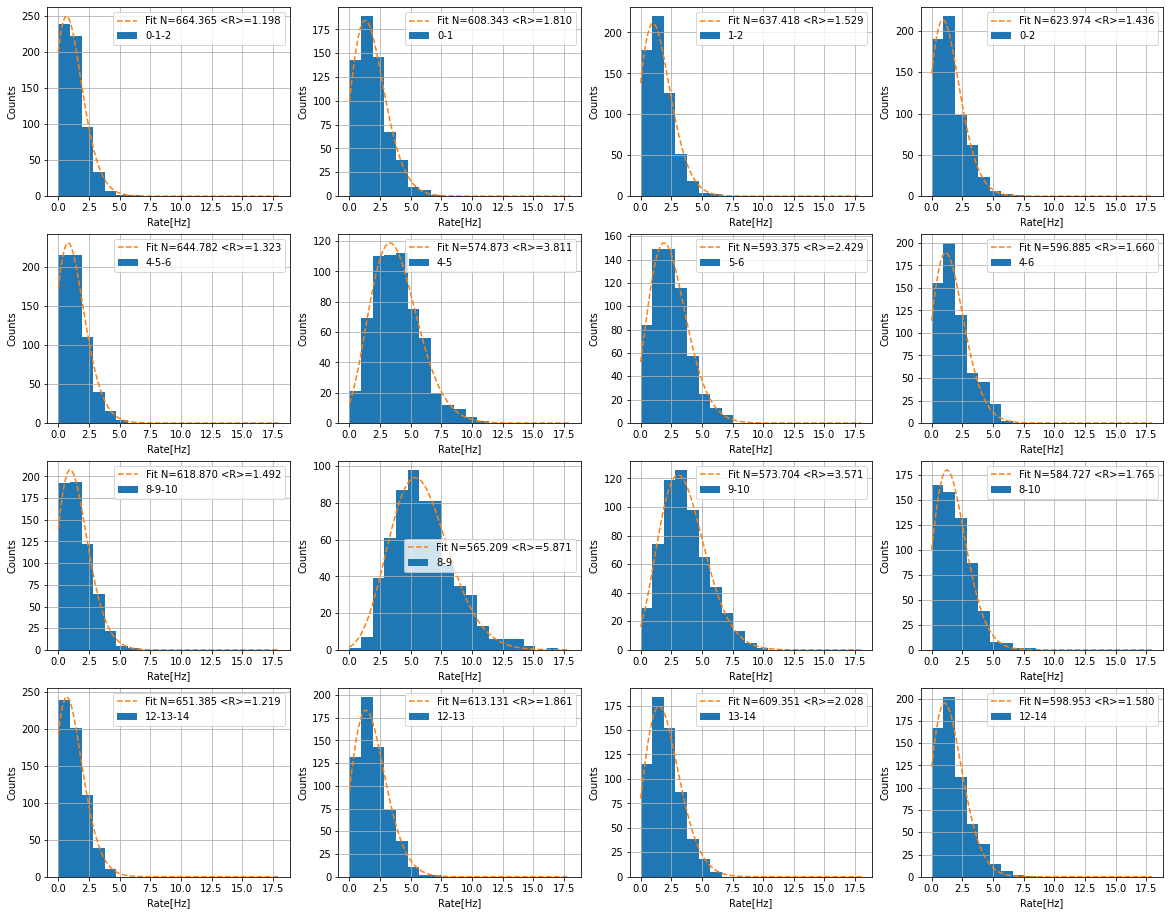

In [ ]:
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

mean_rates = np.mean(data[labels])
x = np.linspace(0,18, 100)
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = []
new_mean_rates = []
k=0

fig,axes=plt.subplots(4,4,sharey=False,figsize=(20,16))

for i in range(0,4):
  for j in range(0,4):
    binned_rates, bins, _ = axes[i,j].hist(data[labels[j+k]], bins=19, range=(0, 18), label=labels[j+k])
    axes[i,j].set_xlabel('Rate[Hz]')
    axes[i,j].set_ylabel('Counts')
    axes[i,j].grid()

    centered_bins = np.array([ (bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
    fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]]])
    axes[i,j].plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
    axes[i,j].legend()

    new_mean_rates.append(fit_pars[1])
    err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

  k=k+4

plt.show()
plt.close()
  